# **Project Name**    - Household Energy Consumption Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Deepak Singh Bisht

# **Project Summary -**

In the context of modern society's heightened focus on sustainability and energy efficiency, accurate prediction of household energy consumption has emerged as a critical area of research and development. As residential buildings constitute a significant portion of overall energy consumption, understanding and predicting the energy usage patterns within households have become imperative for optimizing resource allocation, reducing costs, and minimizing environmental impact. Through the application of data science methodologies, this project delves into the intricate dynamics of household energy consumption, aiming to unravel the multifaceted interplay between environmental factors, human behavior, and energy usage patterns. By leveraging comprehensive datasets and advanced analytical techniques, the project seeks to provide valuable insights into the drivers of energy consumption in residential settings, ultimately contributing to the development of informed strategies for sustainable energy management and conservation.

# **GitHub Link -**

[bisht-deepak/Capstone-Project-Regression](https://github.com/bisht-deepak/Capstone-Project-Regression)

# **Problem Statement**

The goal of this project is to develop a reliable regression model that accurately predicts household appliance energy consumption based on various environmental and internal factors. By analyzing a dataset that includes information such as temperature, humidity, atmospheric pressure, and other relevant parameters, the model should be able to forecast the energy consumed by appliances within a household accurately.
The primary objective is to create a predictive model that can estimate the energy consumption of appliances within a household based on the given set of environmental and internal parameters. The model should provide a robust framework for homeowners to better manage their energy usage and make informed decisions to improve energy efficiency.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#Import Libraries

#for data manipulation and analysis
import numpy as np
import pandas as pd
#set display options for Pandas to show more columns.
pd.set_option('display.max_columns', 500)

#for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns


#for time tracking and progress visualization
from tqdm import tqdm

#for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#for hypothesis testing
from scipy import stats
import statsmodels.api as sm

#for data preprocessing and machine learning.
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import (
    Pipeline, FeatureUnion)

#for data preprocessing.
from sklearn.preprocessing import (  
    FunctionTransformer, StandardScaler, PowerTransformer)

#for feature selection and feature extraction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV

#for evaluating the performance of machine learning models.
from sklearn.metrics import (  
    r2_score, mean_squared_error, mean_absolute_percentage_error, PredictionErrorDisplay)

#for model selection and evaluation.
from sklearn.model_selection import (  
    cross_validate, KFold)
#for cloning an estimator without copying the underlying data.
from sklearn.base import clone  

#for cross-validation and hyperparameter tuning.
from skopt import BayesSearchCV 
from skopt.space import Categorical, Real, Integer

#for regression tasks.
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor)
from xgboost import XGBRegressor 
from catboost import CatBoostRegressor

#for storing the final trained model.
import pickle

### Dataset Loading & First Look

In [2]:
df= pd.read_csv("/kaggle/input/appliances-energy-prediction/KAG_energydata_complete.csv",
                 parse_dates= ["date"], date_format= "%Y-%m-%d %H:%M:%S")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Dataset Rows & Columns count

In [3]:
df.shape

(19735, 29)

### Dataset Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

#### Duplicate Values

In [5]:
df.duplicated().sum()

0

#### Missing Values/Null Values

In [6]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

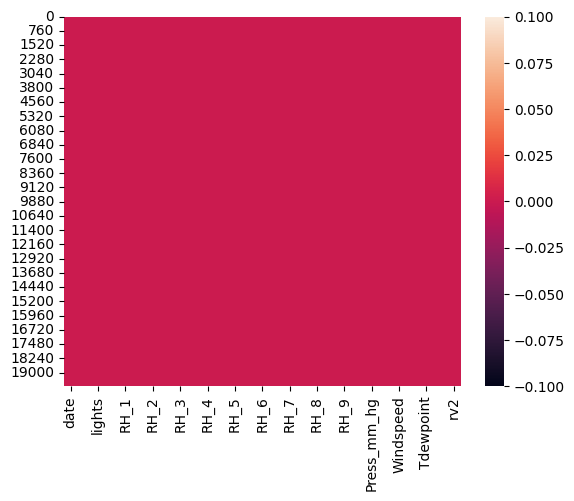

In [7]:
# Visualizing the missing values
sns.heatmap(df.isnull())
plt.show()

### What did you know about your dataset?

The dataset has 29 features, including the target variable with 19735 entries. There are neither any null values nor any duplicate values.

## ***2. Understanding Your Variables***

In [8]:
#restructuring the columns
df.columns= df.columns.str.lower()
df= df.reindex(columns= sorted(df.columns))
df.columns

Index(['appliances', 'date', 'lights', 'press_mm_hg', 'rh_1', 'rh_2', 'rh_3',
       'rh_4', 'rh_5', 'rh_6', 'rh_7', 'rh_8', 'rh_9', 'rh_out', 'rv1', 'rv2',
       't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't_out',
       'tdewpoint', 'visibility', 'windspeed'],
      dtype='object')

In [9]:
#checking dtypes for each column
df.dtypes

appliances              int64
date           datetime64[ns]
lights                  int64
press_mm_hg           float64
rh_1                  float64
rh_2                  float64
rh_3                  float64
rh_4                  float64
rh_5                  float64
rh_6                  float64
rh_7                  float64
rh_8                  float64
rh_9                  float64
rh_out                float64
rv1                   float64
rv2                   float64
t1                    float64
t2                    float64
t3                    float64
t4                    float64
t5                    float64
t6                    float64
t7                    float64
t8                    float64
t9                    float64
t_out                 float64
tdewpoint             float64
visibility            float64
windspeed             float64
dtype: object

In [10]:
df.describe(include= "all")

,appliances,date,lights,press_mm_hg,rh_1,rh_2,rh_3,rh_4,rh_5,rh_6,rh_7,rh_8,rh_9,rh_out,rv1,rv2,t1,t2,t3,t4,t5,t6,t7,t8,t9,t_out,tdewpoint,visibility,windspeed
count,19735.000000,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,2016-03-20 05:30:00,3.801875,755.522602,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401,79.750418,24.988033,24.988033,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828,7.411665,3.760707,38.330834,4.039752
min,10.000000,2016-01-11 17:00:00,0.000000,729.300000,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,24.000000,0.005322,0.005322,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,-5.000000,-6.600000,1.000000,0.000000
25%,50.000000,2016-02-14 23:15:00,0.000000,750.933333,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000,70.333333,12.497889,12.497889,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000,3.666667,0.900000,29.000000,2.000000
50%,60.000000,2016-03-20 05:30:00,0.000000,756.100000,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000,83.666667,24.897653,24.897653,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000,6.916667,3.433333,40.000000,3.666667
75%,100.000000,2016-04-23 11:45:00,0.000000,760.933333,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095,91.666667,37.583769,37.583769,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000,10.408333,6.566667,40.000000,5.500000
max,1080.000000,2016-05-27 18:00:00,70.000000,772.300000,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,100.000000,49.996530,49.996530,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000,26.100000,15.500000,66.000000,14.000000
std,102.524891,NaN,7.935988,7.399441,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497,14.901088,14.496634,14.496634,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712,5.317409,4.194648,11.794719,2.451221


### Variables Description 

|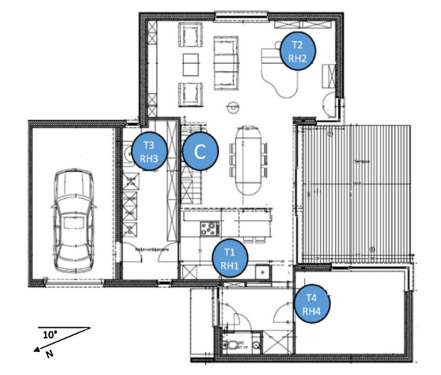|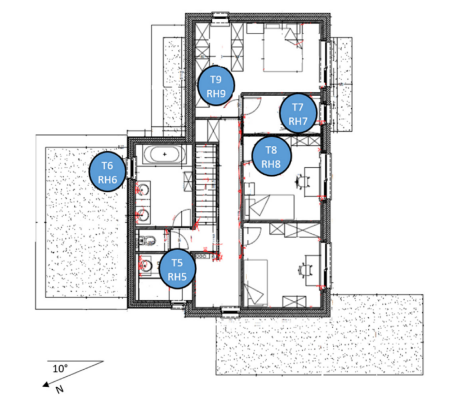|
|:-----------------------------------------------------------------:|:-----------------------------------------------------------------:|
|**First floor.** Temperature and Humidity sensors position. The blue circles indicate the sensor number. The coordinator (C) is positioned around the middle of the house, near the dining room table.|**Second floor.** Location of the Temperature and Humidity sensors. The blue circles indicate the sensor number. Sensor node 6 measures the exterior conditions|

|Variables|Details|Unit|
|---------|-------|----|
|appliance|Energy consumed by appliances|Wh|
|light|Energy consumed by lights|Wh|
|t1|Temperature in kitchen area|◦C|
|rh_1|Humidity in kitchen area|%|
|t2|Temperature in living room area|◦C|
|rh_1|Humidity in living room area|%|
|t3|Temperature in laundry room area|◦C|
|rh_1|Humidity in laundry room area|%|
|t4|Temperature in office room|◦C|
|rh_1|Humidity in office room|%|
|t5|Temperature in bathroom|◦C|
|rh_1|Humidity in bathroom|%|
|t6|Temperature outside the building(north side)|◦C|
|rh_1}| Humidity outside the building(north side)|%|
|t7|Temperature in ironing room |◦C|
|rh_1|Humidity in ironing room|%|
|t8|Temperature in teenager room 2|◦C|
|rh_1|Humidity in teenager room 2|%|
|t9|Temperature in parents room|◦C|
|rh_1|Humidity in parents room |%|
|t_out|Temperature outside (from Chièvres weather station)|◦C|
|rh_out|Humidity outside (from Chièvres weather station)|%|
|pressure|Pressure (from Chièvres weather station)|mm hg|
|visibility|(from Chièvres weather station)|km|
|tdewpoint|(from Chièvres weather station)|◦C|
|rv_1|Non dimensional Random Variable|-|
|rv_2|Non dimensional Random Variable|-|
|date|-|DD/MM/YYYY H:M:S|

### Copy of dataframe- to be used later for model building

In [11]:
#creating a copy of the original data, that'll be used for model building
df_model= df.copy()
df_model.head()

,appliances,date,lights,press_mm_hg,rh_1,rh_2,rh_3,rh_4,rh_5,rh_6,rh_7,rh_8,rh_9,rh_out,rv1,rv2,t1,t2,t3,t4,t5,t6,t7,t8,t9,t_out,tdewpoint,visibility,windspeed
0,60,2016-01-11 17:00:00,30,733.5,47.596667,44.790000,44.730000,45.566667,55.20,84.256667,41.626667,48.900000,45.53,92.0,13.275433,13.275433,19.89,19.2,19.79,19.000000,17.166667,7.026667,17.200000,18.2,17.033333,6.600000,5.3,63.000000,7.000000
1,60,2016-01-11 17:10:00,30,733.6,46.693333,44.722500,44.790000,45.992500,55.20,84.063333,41.560000,48.863333,45.56,92.0,18.606195,18.606195,19.89,19.2,19.79,19.000000,17.166667,6.833333,17.200000,18.2,17.066667,6.483333,5.2,59.166667,6.666667
2,50,2016-01-11 17:20:00,30,733.7,46.300000,44.626667,44.933333,45.890000,55.09,83.156667,41.433333,48.730000,45.50,92.0,28.642668,28.642668,19.89,19.2,19.79,18.926667,17.166667,6.560000,17.200000,18.2,17.000000,6.366667,5.1,55.333333,6.333333
3,50,2016-01-11 17:30:00,40,733.8,46.066667,44.590000,45.000000,45.723333,55.09,83.423333,41.290000,48.590000,45.40,92.0,45.410389,45.410389,19.89,19.2,19.79,18.890000,17.166667,6.433333,17.133333,18.1,17.000000,6.250000,5.0,51.500000,6.000000
4,60,2016-01-11 17:40:00,40,733.9,46.333333,44.530000,45.000000,45.530000,55.09,84.893333,41.230000,48.590000,45.40,92.0,10.084097,10.084097,19.89,19.2,19.79,18.890000,17.200000,6.366667,17.200000,18.1,17.000000,6.133333,4.9,47.666667,5.666667


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.apply(lambda x: x.nunique())

## 3. ***Data Wrangling***
Data Wrangling Code

In [ ]:
df= (
    df
    .assign(
        hour= lambda df_: df_.loc[:, "date"].dt.hour,
        total_consumption= lambda df_: df_.loc[:, "lights"]+ df_.loc[:, "appliances"],
        is_weekend= lambda df_: np.where(df_.loc[:, "date"].dt.weekday>4, 1, 0)
    )
    .rename(columns= {"press_mm_hg": "pressure"})
)

### What all manipulations have you done and insights you found?

Create 3 additional columns- 
> "is_weekend": signifying whether the day in question is a weekday(0) or weekend(1)  
> "hour": needs to be further refined after exploration  
> "total_consumption": by adding columns "appliances" and "lights", this is the real target variable


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univariate Analysis

#### Chart - 1
> Visualizing the Distribution of Numerial Feaures using histograms

In [ ]:
nrows= 6
ncols= np.ceil(len(df.columns)/nrows).astype(int)

fig, axes= plt.subplots(nrows= nrows, ncols= ncols, figsize= (30, 20))
axes= axes.flatten()

for i, feature in enumerate(df.drop(columns= ["date"]).columns):
    sns.histplot(data= df, x= feature, kde=True, ax= axes[i])
    axes[i].set_title(feature) 

#removing subplots that weren't used
for i in range(len(df.drop(columns= ["date"]).columns), nrows * ncols):
    fig.delaxes(axes[i])
    
fig.suptitle("Distribution of Features", fontsize=18)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are highly effective in displaying the distribution of each feature. By observing the skewness and symmetry, you can get a quick understanding of the data's behavior and identify any outliers or peculiar patterns within the dataset.

##### 2. What is/are the insight(s) found from the chart?

**Uniform Distribution of 'Hour', 'RV1', and 'RV2':** The uniform distribution of these variables implies that the data points are evenly distributed, indicating no specific trend or pattern in their occurrence.  
**Right Skewed Distribution of 'Appliances' and 'Total Consumption':** The right-skewed distribution suggests that there are certain instances where the energy consumption by appliances and the total energy consumption are considerably higher than the average. This might indicate peak usage hours or specific periods of high energy consumption.  
**Distinct Pattern in the "Lights" Column:** The "lights" column reveals a structured pattern where values are in discrete intervals of 10, ranging up to 70. Notably, the most frequent value is 0, followed by subsequent values in increasing order, indicating a systematic usage pattern for the lighting system.  
**Symmetric Distribution of Other Variables:** The symmetric distribution, with minor left or right skewness, suggests a more balanced distribution of data points for these variables.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Optimized Resource Allocation:** Understanding the uniform distribution of certain variables can help in allocating resources more evenly across different time periods or segments, leading to more efficient resource utilization.  
**Demand Forecasting and Management:** Analyzing the right-skewed distribution of energy consumption can assist in forecasting peak usage hours, enabling businesses to manage energy demand effectively during these periods and potentially reduce operational costs.

#### Chart - 2
> Visualizing the Distribution of Numerial Feaures using QQ-plot

In [ ]:
nrows= 6
ncols= np.ceil(len(df.columns)/nrows).astype(int)

fig, axes= plt.subplots(nrows= nrows, ncols= ncols, figsize= (30, 27))
axes= axes.flatten()



for i, feature in enumerate(df.drop(columns= ["date"]).columns): 
    stats.probplot(df[feature], dist="norm", plot=axes[i])
    axes[i].set_title(feature)

    
for i in range(len(df.drop(columns= ["date"]).columns), nrows * ncols):
    fig.delaxes(axes[i])

suptitle= fig.suptitle("Distribution of Numerical Features\n(QQ-Plot)", fontsize=18)
suptitle.set_y(1.0)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The QQ-Plot (Quantile-Quantile Plot) was specifically chosen for this analysis to examine the normality of the distribution of each feature. This plot is effective in visually assessing whether a dataset follows a normal distribution or not.

##### 2. What is/are the insight(s) found from the chart?

**Deviation from Normal Distribution:** Some columns, such as 'windspeed', 'rv1', 'rv2', 'visibility', 't2', 'rh_6', 'rh_5', 'rh_out', and 'hour', exhibit deviations from the normal distribution, indicating potential nonlinearity or non-normal behavior in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Accurate Model Assumptions:** Understanding the normal distribution of several columns enables accurate modeling and analysis, allowing businesses to make informed decisions based on robust statistical assumptions.  
**Focused Analysis for Non-Normal Variables:** Identifying deviations from the normal distribution in specific columns can prompt a more focused analysis and the application of specialized statistical techniques for these variables, ensuring the reliability of the analysis results.

#### Chart - 3
> Visualizing Outliers using Boxplot

In [ ]:
nrows= 5
ncols= np.ceil(len(df.columns)/nrows).astype(int)

fig, axes= plt.subplots(nrows= nrows, ncols= ncols, figsize= (30, 27))
axes= axes.flatten()


for i, feature in enumerate(df.drop(columns= ["date"]).columns):
    sns.boxplot(data= df, x= feature, ax= axes[i])
    axes[i].set_title(feature)

    
for i in range(len(df.drop(columns= ["date"]).columns), nrows * ncols):
    fig.delaxes(axes[i])

suptitle= fig.suptitle("Outlier Detection among Features", fontsize=18)
suptitle.set_y(1.0)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Boxplot helps identify outliers within each feature. They are also useful in providing a visual representation of the distribution's central tendency, dispersion, and detection of potential outliers within the dataset.

##### 2. What is/are the insight(s) found from the chart?

**Identification of Outliers:** The boxplots reveal the presence of outliers in numerous features such as 'pressure', 'rh_1', 'rh_2', 'rh_3', 'rh_5', 'rh_7', 'rh_8', 'rh_9', 'rh_out', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't_out', 'tdewpoint', 'visibility', and 'windspeed'.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Improved Data Quality:** Detecting and addressing outliers can lead to improved data quality and reliability, thereby enhancing the accuracy and effectiveness of the subsequent modeling and analysis processes.  
**Enhanced Model Robustness:** Treating outliers before model development can result in more robust and accurate predictive models, enabling businesses to make informed decisions based on reliable and dependable analyses.

### Bivariate Analysis

#### Chart - 4
> Visualizing the Relationship b/w features and target variable (total_consumption) using Scatter Plot

In [ ]:
nrows= 6
ncols= np.ceil(len(df.drop(columns= ["total_consumption", "date"]).columns)/nrows).astype(int)

fig, axes= plt.subplots(nrows= nrows, ncols= ncols, figsize= (30, 20))
axes= axes.flatten()

# plt.subplots_adjust(hspace=0.5)


for i, col in enumerate(df.drop(columns= ["total_consumption", "date"]).columns):
    
    feature= df[col]
    outcome_var= df["total_consumption"]
    correlation= feature.corr(outcome_var)
    axes[i].scatter(feature, outcome_var)
    axes[i].set_title(f"Total Energy Consumption v/s {col} \n correlation: {correlation: .2f}")
    
    #adding a least square line
    z= np.polyfit(feature, outcome_var, deg= 1)
    y_hat= np.poly1d(z)(feature)

    axes[i].plot(feature, y_hat, "r--", lw= 1)
    
for i in range(len(df.drop(columns= ["total_consumption", "date"]).columns), nrows * ncols):
    fig.delaxes(axes[i])


fig.suptitle("Relation b/w Total Energy Consumption and features", fontsize=18)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots were chosen for the bivariate analysis to visualize the relationship between the 'total_consumption' variable and other features. Additionally, the least squares line was included to indicate the general trend and direction of the relationship between the two variables.

##### 2. What is/are the insight(s) found from the chart?

**Correlation Calculation:** Each plot displays the correlation coefficient between the 'total_consumption' variable and the corresponding feature, providing insights into the strength and direction of the linear relationship between the two variables.  
**Visual Analysis of Relationships:** The scatter plots illustrate the overall trend and pattern between the 'total_consumption' variable and each feature, indicating whether there is a positive, negative, or neutral relationship between them.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Identification of Correlated Features:** Understanding the correlation between the 'total_consumption' variable and other features can help identify which features have a significant impact on energy consumption, allowing businesses to prioritize resources and efforts in managing these influential factors.  
**Informing Predictive Models:** Utilizing the insights from the bivariate analysis, businesses can build more accurate predictive models that consider the impact of various features on energy consumption, leading to more reliable and precise predictions.

#### Chart - 5
> Visualizing the Average Daily Energy Consumption by day of the week using Line Plot

In [ ]:
avg_daily_consumption= (
    df
    [["date", "total_consumption"]]
    .groupby(pd.Grouper(key= "date", freq= "D"))
    .sum()
    .reset_index()
    .assign(day= lambda df_: df_["date"].dt.weekday)
    [["day", "total_consumption"]]
    .groupby("day")
    .agg([np.mean, np.std])
    .reset_index()

)
avg_daily_consumption.columns= ["day", "mean", "std"]

sns.lineplot(data= avg_daily_consumption, x= "day", y= "mean")
plt.errorbar(data= avg_daily_consumption, x= "day", y= "mean", yerr= "std", 
             ecolor='b')

plt.title("Average Daily Energy Consumption by Day of the Week")
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

The line plot demonstrates the average daily energy consumption by day of the week, with error bars representing the standard deviation of energy consumption for each day.

##### 2. What is/are the insight(s) found from the chart?

**Weekly Energy Consumption Trends:** The line plot indicates fluctuations in the average daily energy consumption based on the day of the week. These variations provide insights into the consumption patterns, highlighting potential peak and off-peak days for energy usage.  
**Understanding Variability:** The error bars around the line plot signify the standard deviation of energy consumption for each day, showcasing the variability in energy usage within the week and indicating the extent of fluctuations around the mean consumption values for different days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Optimized Resource Allocation:** Understanding the weekly energy consumption trends can facilitate better resource allocation and scheduling, allowing businesses to allocate resources more efficiently during peak consumption days and streamline operations during off-peak periods.  
**Energy Cost Management:** Leveraging insights on the variability of energy consumption can assist in implementing effective energy cost management strategies, enabling businesses to optimize energy usage, reduce costs, and improve overall energy efficiency.

#### Chart- 6
> Visualizing the Average Hourly Energy Consumption using Line Plot

In [ ]:
avg_hourly_consumption_df= (
    df
    [["hour", "appliances"]]
    .groupby("hour", as_index= False)
    .agg([np.mean, np.std])
    .reset_index()
)

avg_hourly_consumption_df.columns= ["hour", "mean", "std"]

#plotting lineplot and errorbars
fig= plt.figure(figsize= (15, 10))
sns.lineplot(data= avg_hourly_consumption_df, x= "hour", y= "mean", marker= "o")
plt.errorbar(data= avg_hourly_consumption_df, x= "hour", y= "mean", yerr= "std", 
             ecolor='b')
#aesthetics
plt.title("Average Hourly Energy Consumption")
plt.xlabel("Energy Consumed")
plt.ylabel("Hour")
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

Line plot with error bars, was chosen to visualize the average hourly energy consumption of appliances with error bars representing the variability in the data. This type of chart effectively displays the trends in the mean values while also indicating the variability or uncertainty associated with each average. By including error bars, it becomes easier to understand the spread of data points around the mean at each hour, providing a comprehensive overview of the fluctuations in appliance consumption throughout the day.

##### 2. What is/are the insight(s) found from the chart?

**Classification of Energy Consumption Hours:** The trends revealed by the line plot enable the classification of energy consumption hours into distinct time slots, providing a comprehensive understanding of the energy usage patterns during various periods of the day.  
**Interpretation of Consumption Trends:** The observed patterns, including low consumption during specific hours (9 pm to 7 am), moderate consumption during other hours (8 am to 4 pm), and high consumption during certain hours (5 pm to 8 pm), offer insights into the users' behavior and energy usage preferences during different times of the day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing the trends in hourly appliance consumption, businesses can optimize their operations and resource allocation accordingly. They can identify peak hours of usage and adjust their energy supply strategies, maintenance schedules, or marketing campaigns to cater to the specific demands during these periods. Additionally, this information can be valuable for offering tailored products or services that align with customer preferences and usage patterns, leading to improved customer satisfaction and potentially increased revenue.

### Multivariate Analysis

#### Chart - 7
> Visualizing the Relationship b/w features and target variable (total_consumption) using Scatter Plot

In [ ]:
fig= plt.figure(figsize= (20, 20))
sns.heatmap(abs(df.drop(columns= ["appliances", "date", "lights"]).corr()), annot= True, fmt= ".2f")
plt.show()

##### 1. Why did you pick the specific chart?

The heatmap illustrates the absolute correlations between different features, allowing for a clear understanding of the relationships and dependencies among the variables.

##### 2. What is/are the insight(s) found from the chart?

**Identification of Redundant Variables:** The 100% correlation between 'rv1' and 'rv2' suggests that these two variables contain identical information, indicating redundancy in the dataset.  
**Strong Correlations for Temperature Variables:** The strong correlations (>80%) observed among all temperature variables suggest a significant interdependence among these features, highlighting their mutual influence on each other within the dataset.  
**Strong Correlations for Room Humidity Variables:** Similarly, the strong correlations (>80%) among all room humidity variables indicate a robust relationship between these features, underscoring their interconnected behavior within the dataset.  
**Correlation of RH6 with Temperature Variables:** The strong correlation (>60%) between 'rh6' and all temperature variables implies a notable relationship between the humidity in a particular room and the corresponding room's temperature, suggesting a potential connection between humidity and temperature variations in that specific room.  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Data Reduction Opportunities:** Identifying redundant variables can lead to data reduction opportunities, simplifying the dataset and improving computational efficiency during analysis and modeling processes.  
**Improved Feature Selection for Modeling:** Understanding the interrelationships among temperature and humidity variables can aid in selecting the most influential features for predictive modeling, enabling businesses to develop more accurate and reliable models that capture the significant variations in temperature and humidity within the building.

#### Chart - 8
> Visualizing the Relationship b/w features using Pair Plot

In [ ]:
sns.pairplot(df.drop(columns= ["date", "appliances", "lights"]).sample(1973))
plt.show()

In [ ]:
sns.pairplot(df[["appliances", "lights", "total_consumption"]].sample(1973))
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot helps visualize the relationships between pairs of variables in the dataset, providing insights into the correlations and distributions between multiple variables simultaneously.

##### 2. What is/are the insight(s) found from the chart?

**Identification of Redundant Variables:** The diagonally running straight line of dots between 'rv1' and 'rv2' suggests that these two variables contain identical information, indicating redundancy in the dataset.  
**Strong Dependency of "total_consumption" on "appliances":** The diagonally running straight line of dots b/w "total_consumption" and "appliances", while "lights" has minimal influence.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Identify complex relationships:** The pair plot enables businesses to identify complex relationships and potential interactions between multiple variables, offering a more holistic perspective on the underlying data patterns.  
**Enhance predictive modeling:** Leveraging the insights from the pair plot can enhance the accuracy and reliability of predictive models, allowing businesses to make more informed decisions and develop effective strategies for energy optimization and resource management.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Visibility (visibility) has a direct relationship with the energy consumption in various areas of the house.  
3. The non-dimensional random variables (rv_1 and rv_2) have no significant impact on the total energy consumption in the household.  
2. The pressure recorded (press_mm_hg) affects the energy consumption pattern within the household.  

In [ ]:
#level of significance
alpha= 0.05

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

> H0: Visibility has no significant impact on energy consumption.  
> H1: Energy consumption is significantly influenced by visibility.  

#### 2. Perform an appropriate statistical test.

In [ ]:
# Adding a constant to the DataFrame
data_with_constant = sm.add_constant(df["visibility"])

# Fitting the simple linear regression model
model = sm.OLS(df["total_consumption"], data_with_constant).fit()

p_value= model.pvalues[1]

print(model.summary())
print("\n\n")
if p_value< alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis. Visibility has no significant impact on energy consumption.")

##### Which statistical test have you done to obtain P-Value?

Simple Linear Regression Analysis

##### Why did you choose the specific statistical test?

Simple Linear Regression is suitable when examining the relationship between one independent variable (visibility in this case) and a dependent variable (energy consumption) in a linear fashion. This test helps to determine whether changes in the visibility variable are associated with significant changes in the energy consumption variable. The resulting p-value helps to assess the statistical significance of the relationship between visibility and energy consumption, providing valuable insights into the impact of visibility on energy usage.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

>H0: The non-dimensional random variables (rv1 and rv2) have no significant impact on the total energy consumption in the household.  
>H1: The non-dimensional random variables (rv1 and rv2) have a significant impact on the total energy consumption in the household.

#### 2. Perform an appropriate statistical test.

**Note:** since all the values in "rv1" and "rv2" are the same, they can be treated as being the same variable, and result from statistical test on one can be treated as being the same for the other.

In [ ]:
#perason correlation test for rv_1 and total consumption
correlation, p_value = stats.pearsonr(df["rv1"], df["total_consumption"])
print(f"Correlation b/w rv1/rv2 and total_consumption: {correlation}")
print(f"p value: {p_value}")
print("\n")
if p_value< alpha:
    print("Reject Null Hypothesis. rv1/rv2 has significant impact on total energy consumption.")
else:
    print("Fail to Reject Null Hypothesis. rv1/rv2 has no significant impact on total energy consumption.")

##### Which statistical test have you done to obtain P-Value?

Pearson correlation coefficient

##### Why did you choose the specific statistical test?

Pearson correlation coefficient is specifically designed to assess the strength and direction of the linear relationship between two continuous variables. As the question revolves around understanding the impact of non-dimensional random variables on total energy consumption, it is crucial to assess the linear relationship between these variables. Therefore, the Pearson correlation coefficient is an appropriate statistical measure for this analysis. Furthermore, the associated p-value helps in determining whether the observed correlation is statistically significant or occurred by chance.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

> H0: The energy consumption does not significantly differ between weekends and weekdays.  
> H1: The energy consumption significantly differs between weekends and weekdays.  

#### 2. Perform an appropriate statistical test.

In [ ]:
# Split the data into two groups based on the 'is_weekend' column
weekend_data = df[df['is_weekend'] == 1]['total_consumption']
weekday_data = df[df['is_weekend'] == 0]['total_consumption']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(weekend_data, weekday_data, equal_var=False)
print(f"t statistic: {t_statistic}")
print("\n")
# Check the p-value
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship b/w weekends and energy consumption.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship b/w weekends and energy consumption.")

##### Which statistical test have you done to obtain P-Value?

Two-Sample t-test

##### Why did you choose the specific statistical test?

Two-sample t-test helps in assessing whether there is a significant difference in the mean total energy consumption between the weekends and weekdays. This test is suitable for comparing the means of two groups and is particularly useful when dealing with continuous data, which makes it an appropriate choice for this scenario. Additionally, the equal_var=False argument allows for the assumption of unequal variances between the two groups, providing a more accurate analysis in case the variances are different.

# ****Model Building****

## ***6. Feature Engineering & Data Pre-processing***

In [12]:
#spliting the dataset in dependent and target variable
X= df_model.drop(columns= ["appliances", "lights"])
y= df_model[["appliances", "lights"]]

### 2. Handling Outliers & Scaling Numerical Columns

In [235]:
def outlier_treatment(col):
    '''
    Apply outlier treatment using the IQR method to the provided column.

    Parameters:
    -----------
    col : numpy.ndarray
        The column for which outliers are to be treated.

    Returns:
    --------
    numpy.ndarray
        The column with outliers treated according to the IQR method.
    '''
    
    q1= np.percentile(col, 25, axis= 0)
    q3= np.percentile(col, 75, axis= 0)

    iqr= q3- q1
    
    lower_bound= q1- 1.5*iqr
    upper_bound=  q3+ 1.5*iqr
    return np.select(
        (col< lower_bound, col> upper_bound),
        (lower_bound, upper_bound),
        col
    )


In [236]:
#list of features with abnormality and outliers
li_abnormal= ["windspeed", "visibility", "t2", "rh_6", "rh_5", "rh_out"]
li_outlier= ["press_mm_hg", "rh_1", "rh_2", "rh_3", "rh_5", "rh_7", "rh_8", "rh_9", "rh_out", "t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t_out", "tdewpoint", "visibility", "windspeed"]

#indexes of columns with non-gaussian distribution
col_index_abnormal= [i for i, feature in enumerate(X.columns) if feature in li_abnormal and feature not in li_outlier]


#indexes of columns with oultiers
col_index_outliers= [i for i, feature in enumerate(X.columns) if feature in li_outlier and feature not in li_abnormal]

#indexes of columns with oultiers and non-gaussian distribution
col_index_abnormal_outlier= [i for i, feature in enumerate(X.columns) if feature in li_abnormal and feature in li_outlier]

In [237]:
num_outliers_pipeline= Pipeline([
    (
        "outlier treatment",
        FunctionTransformer(outlier_treatment)
    ),
    (
        "scaling",
        StandardScaler()
    )
])

num_abnormal_outliers_pipeline= Pipeline([
    (
        "skewness treatment",
        PowerTransformer()
    ),
    (
        "outlier treatment",
        FunctionTransformer(outlier_treatment)
    ),
    
])

In [238]:
num_cols_preprocessing= ColumnTransformer([
    (
        "drop date, rv1, rv2",
        "drop",
        [0, 12, 13]
    ),
    (
        "outlier treatment and scaling",
        num_outliers_pipeline,
        col_index_outliers 
    ),
    (
        "skewness treatment and scaling",
        num_abnormal_outliers_pipeline,
        col_index_abnormal_outlier
    ),
    (
        "outlier and skewness treatment for features with both problems",
        PowerTransformer(),
        col_index_abnormal
    ),
],
    remainder= StandardScaler()
)

In [239]:
numt= num_cols_preprocessing
numerical_cols= ["pressure", "rh_1", "rh_2", "rh_3", "rh_7", "rh_8", "rh_9", "t1", "t3", "t4", "t5", "t6", "t7", "t8", "t_out", "tdewpoint", "rh_5", "rh_out", "t2", "visibility", "windspeed", "rh_6", "rh_4", "t9"]
numt.fit(X)
X_num_processed= numt.transform(X)
X_num_processed_df= pd.DataFrame(X_num_processed, columns= numerical_cols)

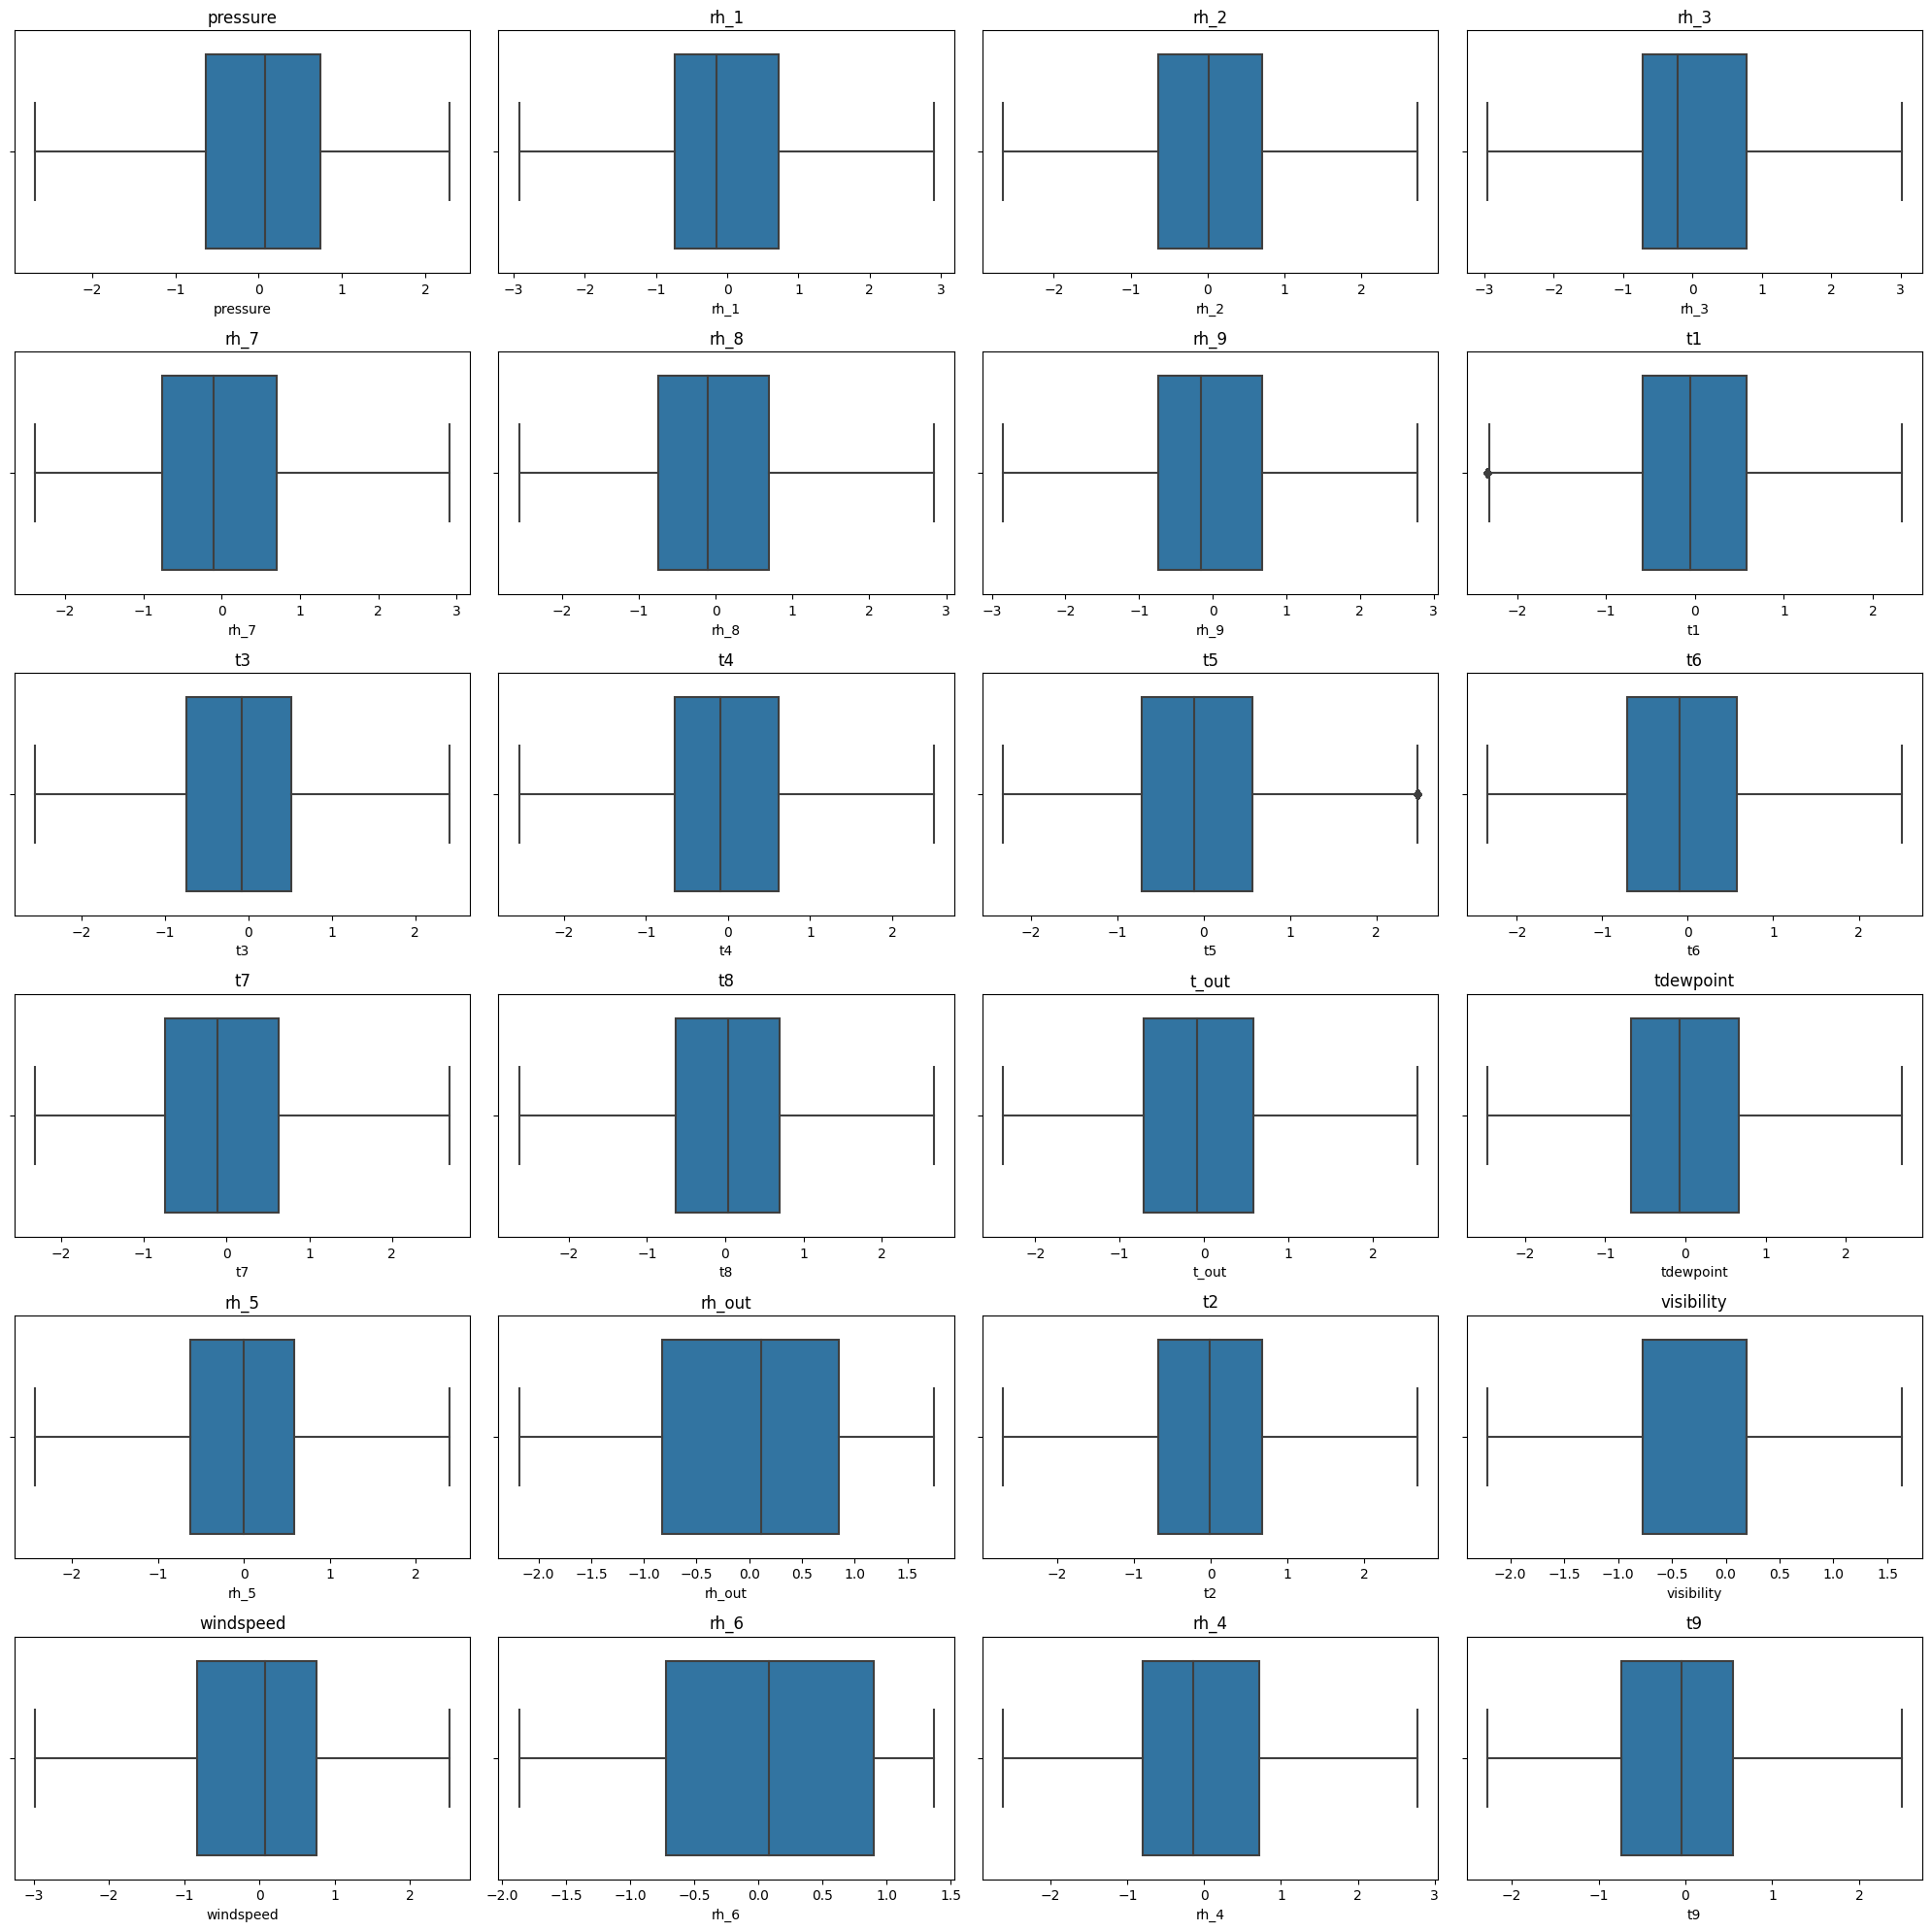

In [240]:
fig, axes= plt.subplots(6, 4, figsize= (20, 20))
axes= axes.flatten()

for i, feature in enumerate(numerical_cols):
    sns.boxplot(data= X_num_processed_df, x= feature, ax= axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

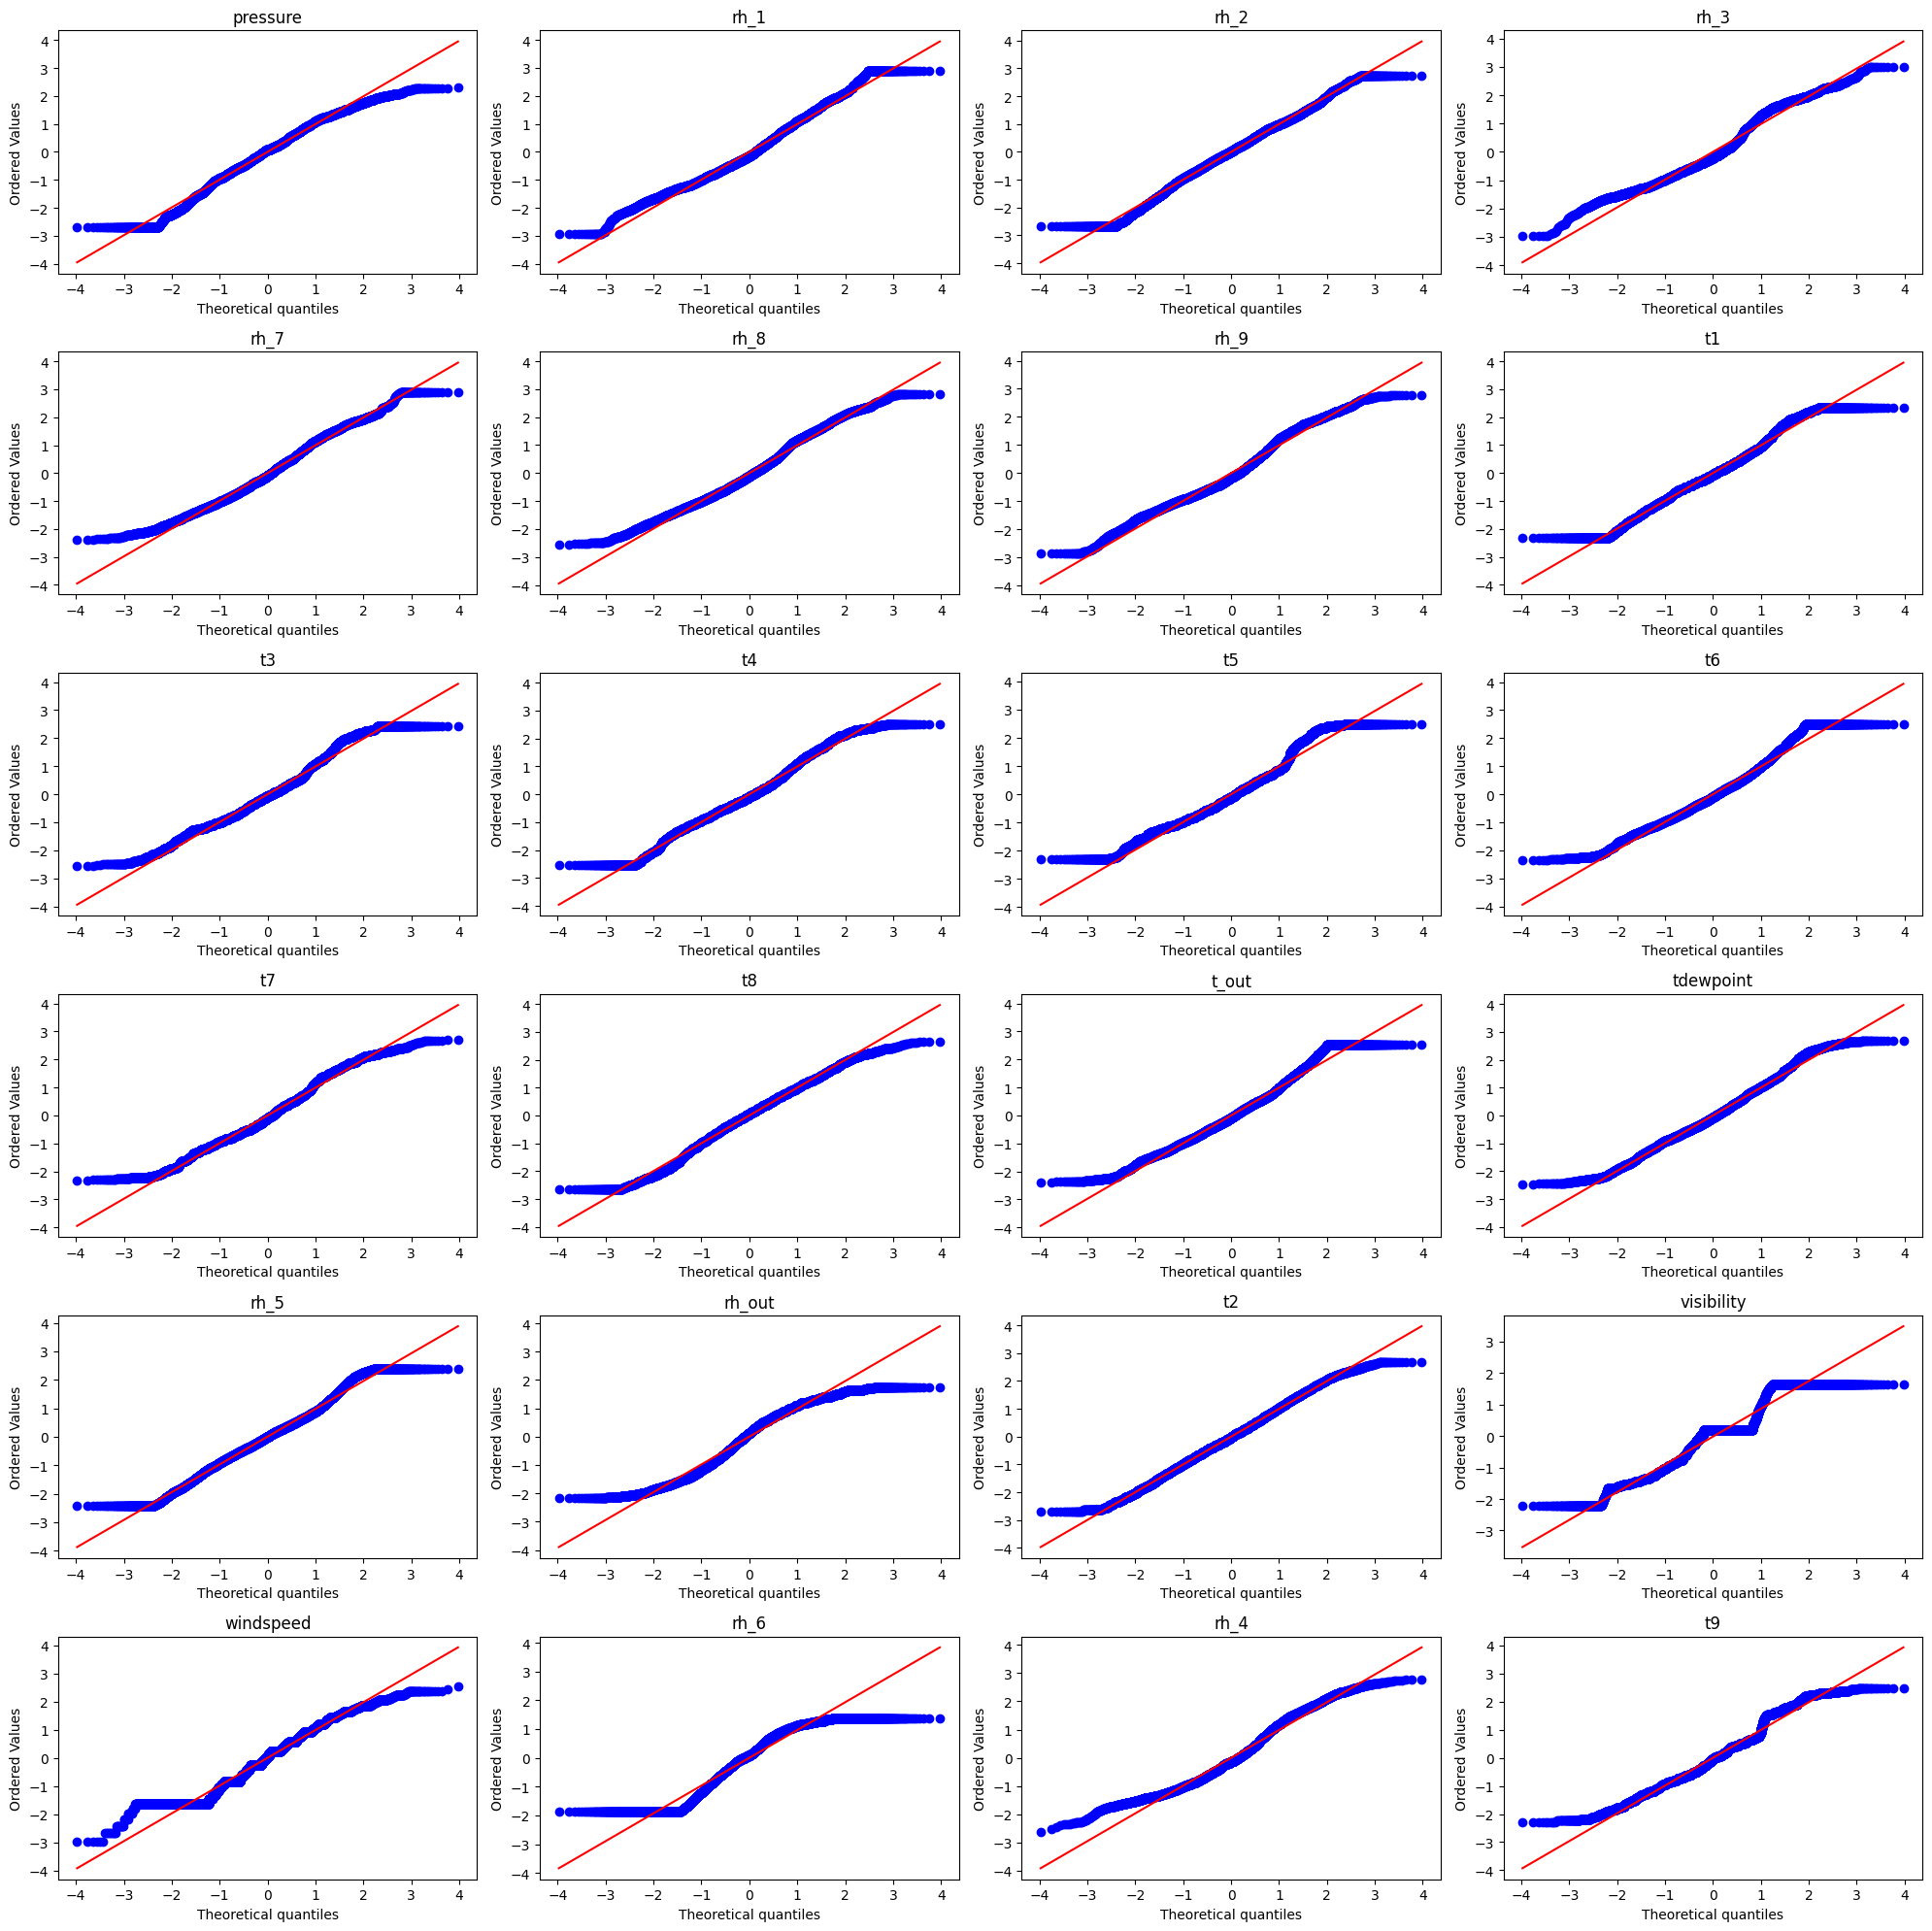

In [241]:
fig, axes= plt.subplots(6, 4, figsize= (20, 20))
axes= axes.flatten()

for i, feature in enumerate(numerical_cols):
    stats.probplot(X_num_processed_df[feature], plot= axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

For Outlier Treatment, i've used the IQR method. The reason for using the IQR method is its robustness in handling skewed distributions and its ability to effectively identify and remove extreme values that can skew the analysis or modeling results.

##### Which method have you used to scale you data and why?

For Scaling the numerical colums, we've used PowerTransformer, because it is effective in handling skewed data distributions by applying power transformations that can make the data distribution more symmetrical. It also helps in reducing the impact of outliers and makes the data more suitable for models that assume normally distributed data.

### 3. Encoding Cyclical Features
reference- [Encoding Cyclical Featues](https://www.kaggle.com/code/avanwyk/encoding-cyclical-features-for-deep-learning)

In [273]:
def day_of_the_week(date):
    """
    Calculate the sine and cosine of the day of the week from the provided date column.

    Parameters:
    -----------
    date : pandas.Series
        A series containing date information.

    Returns:
    --------
    numpy.ndarray
        A transposed array containing the sine and cosine of the day of the week.
    """
    date= date.squeeze()
    
    try:
        return np.transpose(
            np.array([
                np.sin(2*np.pi*date.dt.dayofweek/7),
                np.cos(2*np.pi*date.dt.dayofweek/7)
            ])
        )
    except AttributeError:
        return np.array([
            np.sin(2*np.pi*date.dayofweek/7),
            np.cos(2*np.pi*date.dayofweek/7)
        ]).reshape(1, 2)

In [274]:
def hour_of_the_day(date):
    """
    Calculate the sine and cosine of the hour of the day from the provided date column.

    Parameters:
    -----------
    date : pandas.Series
        A series containing date/time information.

    Returns:
    --------
    numpy.ndarray
        A n*2 array containing the sine and cosine of the hour of the day.
    """
    date= date.squeeze()
    
    try:
        return np.transpose(
            np.array([
                np.sin(2*np.pi*date.dt.hour/24),
                np.cos(2*np.pi*date.dt.hour/24)
        ])
        )
    except AttributeError: 
        return np.array([
                np.sin(2*np.pi*date.hour/24),
                np.cos(2*np.pi*date.hour/24)
            ]).reshape(1, 2)

In [275]:
def day_of_the_month(date):
    """
    Calculate the sine and cosine of the day of the month from the provided date column.

Parameters:
-----------
date : pandas.Series
    A series containing date information.

Returns:
--------
numpy.ndarray
    A transposed array containing the sine and cosine of the day of the month.
    """
    
    date= date.squeeze()
    try:
        return np.transpose(
            np.array([
                np.sin(2*np.pi*date.dt.day/date.dt.days_in_month),
                np.cos(2*np.pi*date.dt.day/date.dt.days_in_month)
            ])
        )
    except AttributeError:
        date= date.squeeze()
        return np.array([
                np.sin(2*np.pi*date.day/date.days_in_month),
                np.cos(2*np.pi*date.day/date.days_in_month)
            ]).reshape(1, 2)

In [276]:
date_transformations= FeatureUnion([
    (
        "sine/cosine transformation of days of the week",
        FunctionTransformer(day_of_the_week)
    ),
    (
        "sine/cosine transformation of hours of the day",
        FunctionTransformer(hour_of_the_day)
    ),
    (
        "sine/cosine transformation of days of the month",
        FunctionTransformer(day_of_the_month)
    )
])

In [278]:
#transforming date into weekday, hour, day
dat= date_transformations
dat.fit(X.iloc[:, 0])
date_cols= ["weekday_sine", "weekday_cos", "hour_sine", "hour_cos", "day_sine", "day_cos"]
X_date_processed= dat.transform(X.iloc[:, 0])
X_date_processed_df= pd.DataFrame(X_date_processed, columns= date_cols)

#initilaizing subplots
fig, axes= plt.subplots(1, 3)

#plotting scatterplot
for i, item in enumerate(("weekday", "hour", "day")):
    sine= item+ "_sine"
    cos= item+ "_cos"
    sns.scatterplot(data= X_date_processed_df, x= sine, y= cos, ax= axes[i])
    axes[i].set_box_aspect(1)
    axes[i].set_title(f"Cyclical Nature of {item.title()}")
    
#adjust layout and display plot
plt.tight_layout()
plt.show()

#### What cyclical encoding techniques have you used & why did you use those techniques?
For the purpose of encoding features that exhibit cyclical nature, such as- days of the week/month, hours of the day, we've employed Angular Distancing Techniques. This allows the machine to get a sense of the cyclical nature of these features.

In [ ]:
#column transformer for feature engineering
feature_engineering= ColumnTransformer([
    (
        "transforming cyclical features",
        date_transformations,
        [0]
    ),
    (
        "outlier treatment and scaling",
        num_outliers_pipeline,
        col_index_outliers 
    ),
    (
        "skewness treatment and scaling",
        num_abnormal_outliers_pipeline,
        col_index_abnormal_outlier
    ),
    (
        "outlier and skewness treatment for features with both problems",
        PowerTransformer(),
        col_index_abnormal
    ),
    (
        "drop rv1 and rv2",
        "drop",
        [12, 13]
    )
],
    remainder= StandardScaler()
)

### 7. Dimesionality Reduction

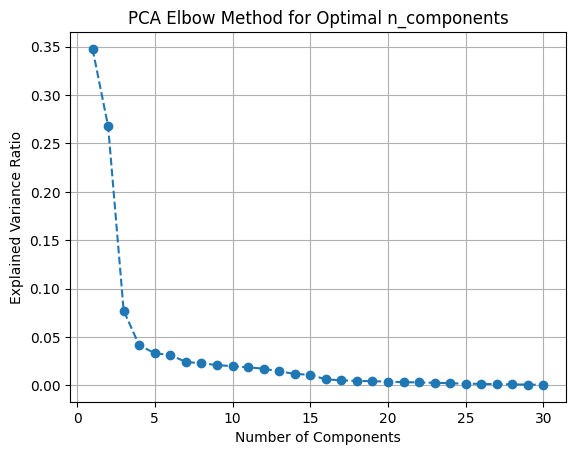

In [28]:
#transorming features
fex= feature_engineering
X_processed= fex.fit_transform(X)

#initializing PCA
pca = PCA()
pca.fit(X_processed)

#extracting explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Using elbow method to find the optimal number of components
num_components = len(explained_variance)
plt.plot(range(1, num_components + 1), explained_variance, marker='o', linestyle='--')
plt.grid(True)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Elbow Method for Optimal n_components")
plt.show()

##### Do you think that dimensionality reduction is needed? Explain Why?

As of now, no dimensionality reduction technique has been implemented on the datasets. But we'll be employing PCA(n_components= 4) and RFE when building the pipelines. And if it produces any significant improvement in the model, we'll continue to use them.

### 8. Data Splitting

In [29]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [30]:
print(f"shape of X_train: {X_train.shape}")
print(f"shape of y_train: {y_train.shape}")

shape of X_train: (13222, 27)
shape of y_train: (13222, 2)


In [31]:
print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_test: (6513, 27)
shape of y_test: (6513, 2)


##### What data splitting ratio have you used and why? 

We've split the dataset into 70/30 train/test ratio because this ratio strikes a balance between having sufficient data for model training and having a reasonable amount of data for testing. Also by allocating 70% of the data for training, the model has access to a reasonably large training set, which can help reduce the risk of overfitting. While a 30% test set is often considered statistically significant, meaning that performance metrics (such as accuracy, precision, recall, etc.) estimated on this test set are likely to be representative of the model's performance on new, unseen data.

### 9. Data Transformation

In [251]:
#transforming feature variables
fe= feature_engineering
fe.fit(X_train)

X_train_processed= fe.transform(X_train)
X_test_processed= fe.transform(X_test)

In [212]:
#transforming target variables
def total_consumption(X):
    return np.array(X.iloc[:, 0] + X.iloc[:, 1]).reshape(-1, 1)

target_engineering = ColumnTransformer([
            (
                "calculating total energy consumption", 
                FunctionTransformer(total_consumption),
                [0, 1]
            ),
    ])

te= target_engineering
te.fit(y_train)
#calculating total consumption from "appliances" and "lights"
y_train_new= te.transform(y_train)
y_test_new= te.transform(y_test)

ss= StandardScaler()
ss.fit(y_train_new)
# Transform the training and test target varibale using the fitted StandardScaler
y_train_processed= ss.transform(y_train_new).ravel()
y_test_processed= ss.transform(y_test_new).ravel()

## ***7. ML Model Implementation***

In [ ]:
#storing ml models in a dictionary
models= {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "KNeigghborsRegressor": KNeighborsRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose= False)
}

In [45]:
#specifying k-folds cross-validator
kfold= KFold(n_splits= 5, shuffle= True, random_state= 42)

In [ ]:
# Initialize an empty list to store metadata
meta_data = []

# Iterate through the items in the 'models' dictionary using tqdm for progress tracking
for name, model in tqdm(models.items()):
    # Create an empty dictionary to store model data
    model_data = {}

    # Assign the 'name' key of the current model to the model_data dictionary
    model_data["name"] = name

    # Set the random_state for reproducibility
    model.random_state = 42

    # Perform cross-validation on the current model
    scores = cross_validate(
        model, X_train_processed, y_train_processed, 
        cv=kfold, 
        scoring=["r2", "neg_mean_squared_error"], 
        error_score="raise"
    )

    # Extract the R2 scores and calculate the average
    r2 = scores["test_r2"]
    # Calculate RMSE scores from negative mean squared error and then compute the average
    rmse = np.sqrt(-scores["test_neg_mean_squared_error"])

    # Add the average R2 and RMSE values to the model_data dictionary
    model_data["average r2"] = f"{np.round(np.mean(r2), 4)} \u00B1 {np.round(np.std(r2), 4)}"
    model_data["average rmse"] = f"{np.round(np.mean(rmse), 4)} \u00B1 {np.round(np.std(rmse), 4)}"

    # Append the model_data dictionary to the meta_data list
    meta_data.append(model_data)

In [ ]:
model_score_df= pd.DataFrame(meta_data).sort_values("average r2", ascending= False).reset_index(drop= True)
model_score_df

In [ ]:
print(f"since, \n{model_score_df.iloc[0,0]}, \n{model_score_df.iloc[1,0]}, \n{model_score_df.iloc[2,0]} and \n{model_score_df.iloc[3,0]}\nhave given the best r2 scores, we'll perform hyperparameter tuning on the same and work forward.")

In [34]:
def crossval_scores(model, round_to= 4):
    """
    Compute cross-validated R2 score and RMSE based on the train dataset.

    Parameters:
    -----------
    model : object
        The model for which cross-validated scores are computed.

    round_to : int, optional
        Number of decimal places to round the scores. Defaults to 4.

    Returns:
    --------
    dict
        A dictionary containing the average R2 score and RMSE score along with their standard deviations.

    """
    
    scores= cross_validate(
        model, X_train, y_train_processed,
        scoring= ["r2", "neg_mean_squared_error"],
        cv= kfold, error_score= "raise",
        n_jobs= -1
    )
    
    r2= scores["test_r2"]
    rmse= np.sqrt(-scores["test_neg_mean_squared_error"])
    
    return {
        "avg r2 score": f'{np.round(np.mean(r2), round_to)} \u00B1 {np.round(np.std(r2), round_to)}',
        "avg rmse score": f'{np.round(np.mean(rmse), round_to)} \u00B1 {np.round(np.std(rmse), round_to)}'
    }

In [35]:
def model_analysis(model, name, round_to= 4):
    """
    Analyze the model using RMSE and R2 scores.

    Parameters:
    -----------
    model : object
        The trained model for analysis.

    name : str
        Name of the model for labeling purposes.

    Returns:
    --------
    dict
        A dictionary containing the model's name, RMSE for train and test datasets, and R2 scores for both datasets.

    """
    
    def mape(y, y_pred):
        return np.round(mean_absolute_percentage_error(y, y_pred), round_to)
    def rmse(y, y_pred):
        return np.round(np.sqrt(mean_squared_error(y, y_pred)), round_to)
    def r2(y, y_pred):
        return np.round(r2_score(y, y_pred), round_to)
    
    y_pred_train= model.predict(X_train)
    y_pred_train= ss.inverse_transform(y_pred_train.reshape(-1, 1))
    
    y_pred_test= model.predict(X_test)
    y_pred_test= ss.inverse_transform(y_pred_test.reshape(-1, 1))

    return {
        "name": name,
        "RMSE (train dataset)": rmse(y_train_new,y_pred_train),
        "RMSE (test dataset)": rmse(y_test_new, y_pred_test),
        "r2_score(train dataset)": r2(y_train_new, y_pred_train),
        "r2_score(test dataset)": r2(y_test_new, y_pred_test),
        "mape (train dataset)": mape(y_train_new, y_pred_train),
        "mape (test dataset)": mape(y_test_new, y_pred_test)
    }

In [36]:
def viz_PredictionErrorDisplay(model, name):
    """
    Visualize Prediction Error Display.

    Parameters:
    -----------
    model : object
        The predictive model for which to visualize the prediction error.

    name : str
        Name of the model for labeling purposes.

    """
    y_pred= model.predict(X_test)
    y_pred= ss.inverse_transform(y_pred.reshape(-1, 1)).ravel()
    
    fig, axes= plt.subplots(figsize= (5, 5))
    PredictionErrorDisplay.from_predictions(
        y_test_new,y_pred,
        kind= "actual_vs_predicted",
        subsample= .50,
        random_state= 42,
        ax= axes
    )
    axes.set_title(f"Actual v/s Predicted Values \n({name})")
    
    plt.show()

In [37]:
def basic_pipeline(model):
    """
    Create a base pipeline with feature engineering and a specified model.

    Parameters:
    -----------
    model : object
        The model to be used in the pipeline.

    Returns:
    --------
    object
        A pipeline with feature engineering and the specified model.
    """
    return Pipeline([
    (
        "feature engineering",
        feature_engineering
    ),
    (
        "model",
        model
    )
])

In [38]:
def find_best_estimator(pipeline, search_spaces, verbose= False):
    """
    Find the best estimator for a given pipeline and search space using BayesSearchCV.

    Parameters:
    -----------
    pipeline : object
        The pipeline to be used for the search.

    search_spaces : dict
        The dictionary specifying the search space for the hyperparameters.

    verbose : bool, optional
        Whether to output detailed logs during the search. Defaults to False.

    Returns:
    --------
    object
        The best estimator found using BayesSearchCV.

    """
    pip= clone(pipeline)
    
    cv= BayesSearchCV(
        pip,
        search_spaces= search_spaces,
        scoring= "neg_mean_squared_error",
        cv= kfold, error_score= "raise",
        n_jobs= -1,
        verbose= verbose
    )
    cv.fit(X_train, y_train_processed)
    
    best_estimator= clone(cv.best_estimator_)
    
    return best_estimator

In [39]:
def pipeline_w_pca(pipeline, on_step= 1, n_components= 15):
    """
    Enhance the pipeline with PCA for feature extraction.

    Parameters:
    -----------
    pipeline : object
        The pipeline to be enhanced with PCA-based feature extraction.

    on_step : int, optional
        The index indicating the step at which the feature extraction should be inserted. Defaults to 1.

    n_components : int, optional
        The number of components to keep. Defaults to 15.

    Returns:
    --------
    object
        A pipeline object with PCA-based feature extraction integrated.

    """
    pip= clone(pipeline)
    pip.steps.insert(on_step, (
        "feature_extraction",
        PCA(n_components= n_components)
    ))
    
    return pip

In [40]:
def pipeline_w_rfe(pipeline, on_step= 1, min_features_to_select= 10):
    """
    Enhance the pipeline with Recursive Feature Elimination (RFE) for feature selection.

    Parameters:
    -----------
    pipeline : object
        The pipeline to be enhanced with RFE-based feature selection.

    on_step : int, optional
        The index indicating the step at which the feature selection should be inserted. Defaults to 1.
    
    min_features_to_select : int, optional
        The minimum number of features to be selected by the RFECV. Defaults to 10.
    
    Returns:
    --------
    object
        A pipeline object with RFE-based feature selection integrated.

    """

    pip= clone(pipeline)
    model= pip.named_steps["model"]
    
    rfecv= RFECV(
        estimator= model,
        step= 1, cv= 5,
        scoring= "r2", 
        min_features_to_select= min_features_to_select,
        n_jobs= -1,
    )
    rfecv.fit(X_train_processed, y_train_processed)

    feature_indexes = rfecv.support_
    pip.steps.insert(on_step, 
                     (
                         "feature_selection", 
                         ColumnTransformer([
                             (
                                 "RFE based feature selection",
                                 "passthrough",
                                 feature_indexes
                             )
                         ],
                             remainder= "drop"
                         )
                     )
                    )
    
    return pip

### ML Model - 1

> #### Extra Trees Regressor

In [252]:
et_pipeline= basic_pipeline(model= ExtraTreesRegressor())
print(crossval_scores(et_pipeline))

In [253]:
et_pipeline.fit(X_train, y_train_processed)

Pipeline(steps=[('feature engineering',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('transforming cyclical '
                                                  'features',
                                                  FeatureUnion(transformer_list=[('sine/cosine '
                                                                                  'transformation '
                                                                                  'of '
                                                                                  'days '
                                                                                  'of '
                                                                                  'the '
                                                                                  'week',
                                                                                  FunctionTransformer(func=<function day_of_the_week at 0x78b352de3e20>)),
                                                                                 ('sine/cosine '
                                                                                  'transformation '
                                                                                  'of '
                                                                                  'hours '
                                                                                  'of '
                                                                                  'the '
                                                                                  'day',
                                                                                  Functio...
                                                 ('skewness treatment and '
                                                  'scaling',
                                                  Pipeline(steps=[('skewness '
                                                                   'treatment',
                                                                   PowerTransformer()),
                                                                  ('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x78b34820a8c0>))]),
                                                  [6, 11, 15, 25, 26]),
                                                 ('outlier and skewness '
                                                  'treatment for features with '
                                                  'both problems',
                                                  PowerTransformer(), [7]),
                                                 ('drop rv1 and rv2', 'drop',
                                                  [12, 13])])),
                ('model', ExtraTreesRegressor())])

In [254]:
ma_et= model_analysis(et_pipeline, name= "et")
ma_et

{'name': 'et',
 'RMSE (train dataset)': 0.0,
 'RMSE (test dataset)': 66.1777,
 'r2_score(train dataset)': 1.0,
 'r2_score(test dataset)': 0.5964,
 'mape (train dataset)': 0.0,
 'mape (test dataset)': 0.27}

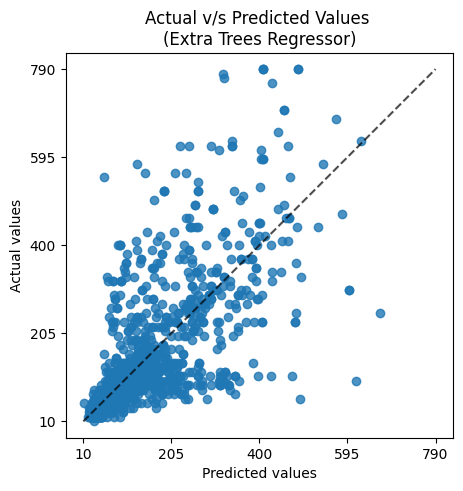

In [49]:
viz_PredictionErrorDisplay(et_pipeline, name= "Extra Trees Regressor")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
et_params= {
    "model__n_estimators": Integer(100, 500, prior= "log-uniform", base= 2), 
    "model__max_depth":  Integer(10, 100, prior='uniform'), 
    "model__bootstrap": Categorical([True, False]), 
    "model__max_features": Categorical([None, "sqrt", "log2"]), 
    "model__warm_start": Categorical([True, False])
}

best_et= find_best_estimator(et_pipeline, search_spaces= et_params)
print(crossval_scores(best_et))

In [ ]:
best_et.fit(X_train, y_train_processed)

In [ ]:
ma_b_et= model_analysis(best_et, name= "best et")
ma_b_et

In [ ]:
viz_PredictionErrorDisplay(best_et, name= "Best Extremly Randomized Trees Regressor")

#### 3. Dimensionality Reduction using RFE

In [ ]:
best_et_w_rfe= pipeline_w_rfe(best_et)
print(crossval_scores(best_et_w_rfe))

In [ ]:
best_et_w_rfe.fit(X_train, y_train_processed)

In [ ]:
ma_b_et_w_rfe= model_analysis(best_et_w_rfe, name= "best et w/ rfe")
ma_b_et_w_rfe

#### 4. Dimensionality Reduction using PCA

In [ ]:
best_et_w_pca= pipeline_w_pca(best_et)
print(crossval_scores(best_et_w_pca))

In [ ]:
best_et_w_pca.fit(X_train, y_train_processed)

In [ ]:
ma_b_et_w_pca= model_analysis(best_et_w_pca, name= "best et w/ pca")
ma_b_et_w_pca

### ML Model - 2

> #### Random Forest Regressor

In [ ]:
rf_pipeline= basic_pipeline(RandomForestRegressor())
print(crossval_scores(rf_pipeline))

In [ ]:
rf_pipeline.fit(X_train, y_train_processed)

In [ ]:
ma_rf= model_analysis(rf_pipeline, name= "rf")
ma_rf

In [ ]:
viz_PredictionErrorDisplay(rf_pipeline, name= "Random Forest Regressor")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
rf_params= {
    "model__n_estimators": Integer(50, 500, prior= "log-uniform"), 
    "model__max_features": Categorical([None, "sqrt", "log2"]),
    "model__bootstrap": Categorical([True, False]), 
    "model__max_depth": Integer(10, 100, prior= "log-uniform"),
}
best_rf= find_best_estimator(rf_pipeline, search_spaces= rf_params)
print(crossval_scores(best_rf))

In [ ]:
best_rf.fit(X_train, y_train_processed)

In [ ]:
ma_b_rf= model_analysis(model= best_rf, name= "best rf")
ma_b_rf

In [ ]:
viz_PredictionErrorDisplay(best_rf, name= "Best Random Forest Regressor")

#### 3. Dimensionality Reduction using PCA

In [ ]:
best_rf_w_pca= pipeline_w_pca(best_rf)
print(crossval_scores(best_rf_w_pca))

In [ ]:
best_rf_w_pca.fit(X_train, y_train_processed)

In [ ]:
ma_b_rf_w_pca= model_analysis(best_rf_w_pca, name= "rf w/ pca")
ma_b_rf_w_pca

In [ ]:
viz_PredictionErrorDisplay(best_rf_w_pca, name= "Best RF Regressor w/ PCA")

#### 4. Dimensionality Reduction using RFE

In [ ]:
best_rf_w_rfe= pipeline_w_rfe(best_rf)
print(crossval_scores(best_rf_w_rfe))

In [ ]:
best_rf_w_rfe.fit(X_train, y_train_processed)

In [ ]:
ma_b_rf_w_rfe= model_analysis(model= best_rf_w_rfe, name= "best rf w/ rfe")
ma_b_rf_w_rfe

In [ ]:
viz_PredictionErrorDisplay(best_rf_w_rfe, name= "Best Random Forest Regressor w/ RFE")

### ML Model - 3

> #### XGB Regressor

In [ ]:
xgb_pipeline= Pipeline([
    (
        "feature_engineering",
        feature_engineering
    ),
    (
        "model",
        XGBRegressor()
    )
])

print(crossval_scores(xgb_pipeline))

In [ ]:
xgb_pipeline.fit(X_train, y_train_processed)

In [ ]:
ma_xgb= model_analysis(xgb_pipeline, name= "xgb")
ma_xgb

In [ ]:
viz_PredictionErrorDisplay(xgb_pipeline, name= "XG Boost")

#### 2. Cross-Validation and Hyperparameter Tuning

In [ ]:
xgb_params= {
    "model__max_depth": Integer(6, 10),
    "model__learning_rate": Real(0.01, 1.0, prior= "log-uniform"),
    "model__subsample": Real(0.5, 1),
}
best_xgb= find_best_estimator(xgb_pipeline, search_spaces= xgb_params)
print(crossval_scores(best_xgb))

In [ ]:
best_xgb.fit(X_train, y_train_processed)

In [ ]:
ma_b_xgb= model_analysis(best_xgb, name= "best xgb")
ma_b_xgb

In [ ]:
viz_PredictionErrorDisplay(best_xgb, name= "Best XG Boost")

#### 3. Dimensionality Reduction using RFE

In [ ]:
best_xgb_w_rfe= pipeline_w_rfe(best_xgb)
print(crossval_scores(best_xgb_w_rfe))

In [ ]:
best_xgb_w_rfe.fit(X_train, y_train_processed)

In [ ]:
ma_b_xgb_w_rfe= model_analysis(best_xgb_w_rfe, name= "best xgb w/ rfe")
ma_b_xgb_w_rfe

In [ ]:
viz_PredictionErrorDisplay(best_xgb_w_rfe, name= "Best XG Boost with RFE")

#### 4. Dimensionality Reduction using PCA

In [ ]:
best_xgb_w_pca= pipeline_w_pca(best_xgb)
print(crossval_scores(best_xgb_w_pca))

In [ ]:
best_xgb_w_pca.fit(X_train, y_train_processed)

In [ ]:
ma_b_xgb_w_pca= model_analysis(best_xgb_w_pca, name= "best xgb w/ pca")
ma_b_xgb_w_pca

In [ ]:
viz_PredictionErrorDisplay(best_xgb_w_pca, name= "Best XG Boost with PCA")

### Model- 4

> #### Cat Boost Regressor

In [ ]:
cat_pipeline= Pipeline([
    (
        "feature_engineering",
        feature_engineering
    ),
    (
        "model",
        CatBoostRegressor(verbose= False)
    )
    
])

print(crossval_scores(cat_pipeline))

In [ ]:
cat_pipeline.fit(X_train, y_train_processed)

In [ ]:
ma_cat= model_analysis(cat_pipeline, name= "cat")
ma_cat

In [ ]:
viz_PredictionErrorDisplay(cat_pipeline, name= "Categorical Boosting Regressor")

#### 2. Cross-Validation and Hyperparameter Tuning

In [ ]:
cat_params= {
    'model__learning_rate': Real(0.01, 1.0, prior='log-uniform'),
    'model__depth': Integer(4, 10),
    'model__l2_leaf_reg': Real(1, 10),
    'model__iterations': Integer(50, 500)
}
best_cat= find_best_estimator(cat_pipeline, cat_params)
print(crossval_scores(best_cat))

In [ ]:
best_cat.fit(X_train, y_train_processed)

In [ ]:
ma_b_cat= model_analysis(best_cat, name= "best cat")
ma_b_cat

In [ ]:
viz_PredictionErrorDisplay(best_cat, name= "Best Categorical Boosting Regressor")

#### 3. Dimensionality Reduction using RFE

In [ ]:
best_cat_w_rfe= pipeline_w_rfe(best_cat)
print(crossval_scores(best_cat_w_rfe))

In [ ]:
best_cat_w_rfe.fit(X_train, y_train_processed)

In [ ]:
ma_b_cat_w_rfe= model_analysis(best_cat_w_rfe, name= "best cat w/ rfe")
ma_b_cat_w_rfe

In [ ]:
viz_PredictionErrorDisplay(best_cat_w_rfe, name= "Best Categorical Boosting Regressor with RFE")

#### 4. Dimensionality Reduction using PCA

In [ ]:
best_cat_w_pca= pipeline_w_pca(best_cat)
print(crossval_scores(best_cat_w_pca))

In [ ]:
best_cat_w_pca.fit(X_train, y_train_processed)

In [ ]:
ma_b_cat_w_pca= model_analysis(best_cat_w_pca, name= "best cat w/ pca")
ma_b_cat_w_pca

In [ ]:
viz_PredictionErrorDisplay(best_cat_w_pca, name= "Best Categorical Boosting Regressor with PCA")

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**R-squared (R2) Score:** This metric was essential for assessing the proportion of variance in the dependent variable that the model was able to explain. A higher R2 score indicates a better fit of the model to the data, highlighting its ability to capture the variability in energy consumption accurately.

**Mean Absolute Percentage Error (MAPE):** This metric helps gauge the average percentage deviation between the predicted and actual energy consumption values. MAPE provides a clear understanding of the model's accuracy, particularly in the context of practical energy consumption predictions, which is crucial for ensuring reliable and precise forecasts.

**Root Mean Squared Error (RMSE):** RMSE helps measure the square root of the average of the squared differences between the predicted and actual energy consumption values. RMSE provides a comprehensive understanding of the magnitude of errors between the predicted and observed values, enabling a more precise assessment of the model's predictive accuracy.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
pd.DataFrame([ma_rf, ma_b_rf, ma_b_rf_w_rfe, ma_b_rf_w_pca, 
              ma_et, ma_b_et, ma_b_et_w_rfe, ma_b_et_w_pca,
              ma_xgb, ma_b_xgb, ma_b_xgb_w_rfe,ma_b_xgb_w_pca,
              ma_cat, ma_b_cat, ma_b_cat_w_rfe, ma_b_cat_w_pca]).sort_values("r2_score(test dataset)", ascending= False)

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
#list of features
features_after_preprocessing= date_cols+ numerical_cols

#indexes of features selected after RFE
selected_feature_indices = best_et_w_rfe.named_steps["feature_selection"].output_indices_["RFE based feature selection"]
selected_features= features_after_processing[selected_feature_indices]
#finding features and their relative importances
feature_importance= best_et_w_rfe.named_steps["model"].feature_importances_
#plugging it into a dataframe
feature_importance_df= pd.DataFrame({"features": selected_features, "importance coeff": feature_importance}).sort_values("importance coeff", ascending= False)
feature_importance_df

In [ ]:
sns.barplot(data= feature_importance_df, x= "importance coeff", y= "features",
            color= "#1f77b4")
plt.show()

The model used for the Energy Consumption Prediction Regression Problem was the **ExtraTreesRegressor with Recursive Feature Elimination (RFE)**, which effectively identified the most relevant features for accurate energy consumption forecasting. By leveraging the model's built-in feature_importance_ attribute, the importance coefficients for various features were determined, highlighting their individual contributions to the overall predictive power of the model. Notably, the following features were identified as the most influential in predicting energy consumption, based on their respective importance coefficients:

1. weekday_cos
2. hour_sine
3. pressure
4. rh_7
5. t1
6. rh_2
7. rh_5
8. rh_1
9. rh_3
10. rh_out
11. t5
12. rh_8
13. tdewpoint
14. t_out
15. day_cos

These features played a critical role in capturing the underlying patterns and dynamics of energy consumption, emphasizing their significance in the model's decision-making process and overall predictive accuracy. By considering these key features, the model was able to provide reliable and precise forecasts, contributing to a comprehensive understanding of the factors influencing energy consumption in the context of the problem at hand.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.

In [264]:
# #NOTE- when rerunning this entire file, un-comment this cell, otherwise error will occur in subsiquent cells
# import os
# os.remove("/kaggle/working/ss")
# os.remove("/kaggle/working/et_rfe")
# os.remove("/kaggle/working/te")

In [ ]:
pickle.dump(target_engineering, open("te", "wb"))
pickle.dump(ss,open("ss", "wb"))
pickle.dump(best_et_w_rfe, open("et_rfe", "wb"))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [ ]:
target_eng= pickle.load(open("te", "rb"))
ss= pickle.load(open("ss","rb"))
reg_model= pickle.load(open("et_rfe", "rb"))

In [190]:
def record(i= None, X= X_test, y= y_test):
    if i is None:
        i= np.random.randint(0, X.shape[0])
    return X.iloc[[i]], y.iloc[[i]]

In [263]:
X_, y_= record()
y_true= target_eng.transform(y_)[0][0]
y_pred= reg_model.predict(X_).reshape(-1, 1)
y_pred= ss.inverse_transform(y_pred)[0][0]
print(f"true y: {y_true}")
print(f"predicted y: {y_pred}")

true y: 130
predicted y: 116.5


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In the process of building the Energy Consumption Prediction Regression model, several valuable lessons were learned. Notably, the utilization of the angular distance method for encoding cyclical features, such as the day of the week, hour, and day of the month, proved instrumental in capturing the temporal patterns inherent in the energy consumption data. By employing this technique, the model could effectively interpret and leverage the cyclical nature of time-related features, thereby enhancing its predictive capabilities and capturing subtle variations in energy consumption patterns over different time intervals. This approach not only improved the model's overall performance but also deepened our understanding of feature engineering techniques suitable for time-series data analysis in the context of energy consumption prediction.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***